<a href="https://colab.research.google.com/github/agarwalsourabh55/Generalised_MODELLING/blob/sourabh_dev/allmlmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = "/content/gdrive/MyDrive/diabetes.csv"
import pandas as pd
data = pd.read_csv(path)


In [7]:
from sklearn.model_selection import train_test_split

train = data.drop('Diabetic',axis=1)
target = data['Diabetic']
X_train,X_test,y_train,y_test = train_test_split(train,
                                                target,
                                                train_size = 0.8)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns


LogisticRegressionClassification
LogisticRegression()
              metrics dataset type    scores
0      Accuracy Score        train  0.665125
1      Accuracy Score         test  0.667500
2     Precision Score        train  0.000000
3     Precision Score         test  0.000000
4       ROC AUC Score        train  0.500000
5       ROC AUC Score         test  0.500000
6        Recall Score        train  0.000000
7        Recall Score         test  0.000000
8            f1 Score        train  0.000000
9            f1 Score         test  0.000000
10  Cohen Kappa Score        train  0.000000
11  Cohen Kappa Score         test  0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'LogisticRegressionClassification': LogisticRegression(),
 'SupportVectorMachineClassifier': SVC(),
 'KNearestClassification': KNeighborsClassifier(),
 'DecisionTreeClassification': DecisionTreeClassifier(),
 'RandomForestClassification': RandomForestClassifier(),
 'XGBoostclassifier': XGBClassifier(),
 'LGboostClassifier': LGBMClassifier()}

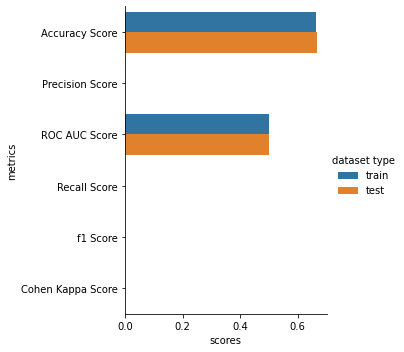

In [17]:
class CLASSIFICATION_MODELS:
  def __init__(self,X_train,X_test,y_train,y_test):
    self.X_train = X_train
    self.X_test = X_test
    self.y_train= y_train
    self.y_test = y_test

  def showing_plots(self,dataframe):
    print(dataframe)
    sns.catplot(y="metrics",
                x="scores",
                hue="dataset type",
                kind="bar",
                data=dataframe,
                )

  def calculating_all_metrics(self,prediction_test, prediction_train):
    test_accuracy = accuracy_score(self.y_test, prediction_test)
    train_accuracy = accuracy_score(self.y_train,prediction_train)

    test_precision = precision_score(self.y_test, prediction_test)
    train_precision = precision_score(self.y_train,prediction_train)

    test_roc = roc_auc_score(self.y_test, prediction_test)
    train_roc = roc_auc_score(self.y_train,prediction_train)

    test_recall = recall_score(self.y_test, prediction_test)
    train_recall = recall_score(self.y_train,prediction_train)

    test_f1 = f1_score(self.y_test, prediction_test)
    train_f1 = f1_score(self.y_train,prediction_train)

    test_cohen = cohen_kappa_score(self.y_test, prediction_test)
    train_cohen = cohen_kappa_score(self.y_train,prediction_train)

    data =  {
              "metrics":['Accuracy Score','Accuracy Score',
                        'Precision Score','Precision Score',
                        'ROC AUC Score','ROC AUC Score',
                        'Recall Score','Recall Score',
                        'f1 Score','f1 Score',
                        'Cohen Kappa Score','Cohen Kappa Score'],
              "dataset type":["train","test",
                              "train","test",
                              "train","test",
                              "train","test",
                              "train","test",
                              "train","test"],
              "scores":[train_accuracy,test_accuracy,
                        train_precision,test_precision,
                        train_roc,test_roc,
                        train_recall,test_recall,
                        train_f1,test_f1,
                        train_cohen,test_cohen]
              }
    dataframes = pd.DataFrame(data)
    self.showing_plots(dataframes)

  def calculating_accuracy(self,model_dict):

    for key,val in model_dict.items():
      print(key)
      print(val)
      prediction_test = val.predict(self.X_test)
      prediction_train = val.predict(self.X_train)
      self.calculating_all_metrics(prediction_test,
                                   prediction_train)
      break

  def modellingwithaccuracy(self):
    logistic_model = self.logistic_regression_base()
    svclassifier = self.svm_classifier()
    knn_classifier = self.kneighbour_clasifier()
    dt_classifier = self.decisiontree_classifier()
    rf_classifier = self.randomforest_classifier()
    xgb_classifier = self.xgboost_classifier()
    lgb_classifier = self.lgbm_classifier()

    model_dict = {"LogisticRegressionClassification":logistic_model,
                  "SupportVectorMachineClassifier":svclassifier,
                  "KNearestClassification":knn_classifier,
                  "DecisionTreeClassification":dt_classifier,
                  "RandomForestClassification":rf_classifier,
                  "XGBoostclassifier":xgb_classifier,
                  "LGboostClassifier":lgb_classifier
                  }
    self.calculating_accuracy(model_dict)
    return model_dict

  def logistic_regression_base(self):
    logistic_model = LogisticRegression()
    logistic_model.fit(self.X_train,self.y_train)
    return logistic_model

  def svm_classifier(self):
    svclassifier = SVC()
    svclassifier.fit(self.X_train,self.y_train)
    return svclassifier

  def kneighbour_clasifier(self):
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(self.X_train,self.y_train)
    return knn_classifier

  def decisiontree_classifier(self):
    decision_classifier = DecisionTreeClassifier()
    decision_classifier.fit(self.X_train,self.y_train)
    return decision_classifier

  def randomforest_classifier(self):
    random_classifier=RandomForestClassifier()
    random_classifier.fit(self.X_train,self.y_train)
    return random_classifier

  def xgboost_classifier(self):
    xgb_classifier = XGBClassifier()
    xgb_classifier.fit(self.X_train,self.y_train)
    return xgb_classifier

  def lgbm_classifier(self):
    lgb_classifier = lgb.LGBMClassifier()
    lgb_classifier.fit(self.X_train,self.y_train)
    return lgb_classifier

cm = CLASSIFICATION_MODELS(X_train,X_test,y_train,y_test)
cm.modellingwithaccuracy()


In [ ]:
              metrics dataset type    scores
0      Accuracy Score        train  0.665125
1      Accuracy Score         test  0.667500
2     Precision Score        train  0.000000
3     Precision Score         test  0.000000
4       ROC AUC Score        train  0.500000
5       ROC AUC Score         test  0.500000
6        Recall Score        train  0.000000
7        Recall Score         test  0.000000
8            f1 Score        train  0.000000
9            f1 Score         test  0.000000
10  Cohen Kappa Score        train  0.000000
11  Cohen Kappa Score         test  0.000000
/usr/local/lib/python3.7/dist-packages/sklearn